# WeatherPy
----

### Analysis
* Maximum temperature is greatest at the equator but the  maximum temperatures in northern and southern hemispheres shift seasonally, which is depicted in scatter plot.  Southern hemisphere appears significantly warmer this time of year.
* Humidity and rain (100% humidity) appears more evenly distributed over both latitudes.  In the humidity plot, it appears the cities along the equator appear primarily either very high humidity or none.
* Cloudiness has no relationship to latitude in this scatterplot.
* Wind speed appears to have limited relationship to latitude, with the exception in this scatter plot of higher speeds at the extreme ends of southern and northern latitudes; particularly in the northern, which may have relationship to seasonality and being more distant from the sun.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import pandas as pd
import numpy as np
import requests
import time

# Import API key
# import api_keys
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

In [27]:
print(lat_lngs)

In [28]:
len(lats)

1500

In [29]:
len(lngs)

1500

In [30]:
coordinates_df = pd.DataFrame({'Latitude': lats, 'Longitude': lngs})
coordinates_df.tail()

Latitude   Longitude
1495   9.262260  174.968494
1496  -2.513259  -38.705035
1497  46.371467  -97.729206
1498  17.078564  153.545183
1499 -66.061326   -9.746742

In [31]:
cities_df = pd.DataFrame({'City': cities})
cities_df.tail()

City
597  stykkisholmur
598    kesova gora
599     le vauclin
600         trairi
601    valley city

In [32]:
#Set up City as first column of future full dataframe
cities_weather = cities_df.copy()
cities_weather.head()

City
0        vaini
1       bethel
2        ankpa
3      mataura
4  provideniya

In [33]:
#set up additional columns in dataframe
cities_weather ['Country'] = ""
cities_weather ['Date'] = ""
cities_weather ['Latitude'] = ""
cities_weather ['Longitude'] = ""
cities_weather ['Cloudiness'] = ""
cities_weather ['Max_Temp'] = ""
cities_weather ['Humidity'] = ""
cities_weather ['Wind_Speed'] = ""

cities_weather.head()

City Country Date Latitude Longitude Cloudiness Max_Temp Humidity  \
0        vaini                                                                
1       bethel                                                                
2        ankpa                                                                
3      mataura                                                                
4  provideniya                                                                

  Wind_Speed  
0             
1             
2             
3             
4

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [34]:
# import openweathermapy.core as owm
# Set up base url and define units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Query url
query_url = f"{url}appid={api_key}&units={units}&q="

# use iterrows to iterate through pandas dataframe
for index, row in cities_weather.iterrows():
    print(index)

    cityrow = row['City']
    
    try:
        response = requests.get(query_url + cityrow).json()
        pprint(response)

        results = response

        cities_weather.loc[index, 'Country'] = results['sys']['country']
        cities_weather.loc[index, 'Date'] = results['dt']
        cities_weather.loc[index, 'Latitude'] = results['coord']['lat']
        cities_weather.loc[index, 'Longitude'] = results['coord']['lon']
        cities_weather.loc[index, 'Cloudiness'] = results['clouds']['all']
        cities_weather.loc[index, 'Max_Temp'] = results['main']['temp_max']
        cities_weather.loc[index, 'Humidity'] = results['main']['humidity']
        cities_weather.loc[index, 'Wind_Speed'] = results['wind']['speed']
        print()
        
    except (KeyError, IndexError):
        print("Data not found... skipping.")
        print("------------")


0
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 15.34, 'lon': 74.49},
 'dt': 1557098300,
 'id': 1273574,
 'main': {'grnd_level': 1004.38,
          'humidity': 84,
          'pressure': 1010.76,
          'sea_level': 1010.76,
          'temp': 74.48,
          'temp_max': 74.48,
          'temp_min': 74.48},
 'name': 'Vaini',
 'sys': {'country': 'IN',
         'message': 0.0053,
         'sunrise': 1557102992,
         'sunset': 1557148848},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 44.406, 'speed': 2.15}}

1
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 60.79, 'lon': -161.76},
 'dt': 1557096780,
 'id': 5880568,
 'main': {'humidity': 49,
          'pressure': 1001,
          'temp': 48.18,
          'temp_max': 50,
          'temp_min': 46.4},
 'name': 'Bethel',
 'sys': {'country': 'US',
         'id': 7640,
         'messag

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 24.63, 'lon': 46.72},
 'dt': 1557093600,
 'id': 108410,
 'main': {'humidity': 54,
          'pressure': 1016,
          'temp': 80.6,
          'temp_max': 80.6,
          'temp_min': 80.6},
 'name': 'Riyadh',
 'sys': {'country': 'SA',
         'id': 7424,
         'message': 0.0055,
         'sunrise': 1557108890,
         'sunset': 1557156279,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 300, 'speed': 3.36}}

14
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 49.78, 'lon': -74.86},
 'dt': 1557097200,
 'id': 5919850,
 'main': {'humidity': 32,
          'pressure': 1007,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Chapais',
 'sys': {'country': 'CA',
         'id': 859,
         'message': 0.0044,


 'main': {'humidity': 45,
          'pressure': 1012,
          'temp': 82.38,
          'temp_max': 84.99,
          'temp_min': 79},
 'name': 'Nome',
 'sys': {'country': 'US',
         'id': 3476,
         'message': 0.0052,
         'sunrise': 1557055888,
         'sunset': 1557104233,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 130, 'speed': 4.7}}

27
{'base': 'stations',
 'clouds': {'all': 61},
 'cod': 200,
 'coord': {'lat': -2.75, 'lon': -42.83},
 'dt': 1557098572,
 'id': 3406196,
 'main': {'grnd_level': 1006.8,
          'humidity': 90,
          'pressure': 1011.12,
          'sea_level': 1011.12,
          'temp': 76.46,
          'temp_max': 76.46,
          'temp_min': 76.46},
 'name': 'Barreirinhas',
 'sys': {'country': 'BR',
         'message': 0.0055,
         'sunrise': 1557046064,
         'sunset': 1557089295},
 'weath


40
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -23.58, 'lon': 149.07},
 'dt': 1557098278,
 'id': 2175403,
 'main': {'grnd_level': 992.6,
          'humidity': 37,
          'pressure': 1017.79,
          'sea_level': 1017.79,
          'temp': 66.92,
          'temp_max': 66.92,
          'temp_min': 66.92},
 'name': 'Bluff',
 'sys': {'country': 'AU',
         'message': 0.0045,
         'sunrise': 1557087958,
         'sunset': 1557128085},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 142.962, 'speed': 11.88}}

41
{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': 70.62, 'lon': 147.9},
 'dt': 1557098277,
 'id': 2126123,
 'main': {'grnd_level': 1014.51,
          'humidity': 89,
          'pressure': 1016.26,
          'sea_level': 1016.26,
          'temp': 28.4,
          'temp_max': 28.4,
          'temp_min': 28.4},
 'name': '

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 42.65, 'lon': -73.75},
 'dt': 1557098043,
 'id': 5106834,
 'main': {'humidity': 81,
          'pressure': 1011,
          'temp': 54.01,
          'temp_max': 57.2,
          'temp_min': 50},
 'name': 'Albany',
 'rain': {'1h': 0.25},
 'sys': {'country': 'US',
         'id': 5414,
         'message': 0.0074,
         'sunrise': 1557049473,
         'sunset': 1557100727,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'},
             {'description': 'mist', 'icon': '50d', 'id': 701, 'main': 'Mist'}],
 'wind': {'speed': 3.36}}

54
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 43.97, 'lon': -111.68},
 'dt': 1557098434,
 'id': 5606187,
 'main': {'humidity': 18,
          'pressure': 1007,
          'temp': 67.44,
          'temp_max': 69.8,
          'temp_min': 62.6},


              'main': 'Clear'}],
 'wind': {'deg': 206.338, 'speed': 3.53}}

69
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
70
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
71
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 39.95, 'lon': -94.76},
 'dt': 1557098182,
 'id': 4407665,
 'main': {'humidity': 41,
          'pressure': 1008,
          'temp': 75.54,
          'temp_max': 77,
          'temp_min': 73.99},
 'name': 'Kodiak',
 'sys': {'country': 'US',
         'id': 5924,
         'message': 0.0053,
         'sunrise': 1557054871,
         'sunset': 1557105413,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'gust': 10.8, 'speed': 16.11}}

72
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 22.08, 'lon': -1

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 5.39, 'lon': 26.49},
 'dt': 1557098606,
 'id': 236950,
 'main': {'grnd_level': 939.32,
          'humidity': 92,
          'pressure': 1008.18,
          'sea_level': 1008.18,
          'temp': 72.32,
          'temp_max': 72.32,
          'temp_min': 72.32},
 'name': 'Obo',
 'sys': {'country': 'CF',
         'message': 0.0042,
         'sunrise': 1557115248,
         'sunset': 1557159631},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 144.029, 'speed': 4.34}}

88
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 49.96, 'lon': 82.61},
 'dt': 1557095400,
 'id': 1520316,
 'main': {'humidity': 63,
          'pressure': 1026,
          'temp': 35.6,
          'temp_max': 35.6,
          'temp_min': 35.6},
 'name': 'Oskemen',
 'sys': {'country': 'KZ',
         'id': 8831,
         'mes

103
{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 51.1, 'lon': 66.31},
 'dt': 1557098609,
 'id': 1524606,
 'main': {'grnd_level': 994.28,
          'humidity': 38,
          'pressure': 1028.77,
          'sea_level': 1028.77,
          'temp': 55.04,
          'temp_max': 55.04,
          'temp_min': 55.04},
 'name': 'Derzhavinsk',
 'sys': {'country': 'KZ',
         'message': 0.0051,
         'sunrise': 1557100790,
         'sunset': 1557154976},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 162.489, 'speed': 7.2}}

104
{'base': 'stations',
 'clouds': {'all': 28},
 'cod': 200,
 'coord': {'lat': -26.65, 'lon': 15.16},
 'dt': 1557093600,
 'id': 3355672,
 'main': {'humidity': 100,
          'pressure': 1016,
          'temp': 55.4,
          'temp_max': 55.4,
          'temp_min': 55.4},
 'name': 'Luderitz',
 'sys': {'country': 'NA',
         'id': 2260,

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 13.72, 'lon': 123.58},
 'dt': 1557098613,
 'id': 1691355,
 'main': {'grnd_level': 1006.7,
          'humidity': 76,
          'pressure': 1009.12,
          'sea_level': 1009.12,
          'temp': 83.3,
          'temp_max': 83.3,
          'temp_min': 83.3},
 'name': 'Sabang',
 'sys': {'country': 'PH',
         'message': 0.0049,
         'sunrise': 1557091338,
         'sunset': 1557136940},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 207.174, 'speed': 8.1}}

118
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 64.84, 'lon': -147.72},
 'dt': 1557098193,
 'id': 5861897,
 'main': {'humidity': 29,
          'pressure': 1008,
          'temp': 46.56,
          'temp_max': 50,
          'temp_min': 43},
 'name': 'Fairbanks',
 'sys': {'country': 'US',
         'id': 7683,
        

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 11.28, 'lon': 49.18},
 'dt': 1557098616,
 'id': 64013,
 'main': {'grnd_level': 1008.7,
          'humidity': 64,
          'pressure': 1010.77,
          'sea_level': 1010.77,
          'temp': 87.26,
          'temp_max': 87.26,
          'temp_min': 87.26},
 'name': 'Bosaso',
 'sys': {'country': 'SO',
         'message': 0.0049,
         'sunrise': 1557109373,
         'sunset': 1557154615},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 160.645, 'speed': 5.99}}

131
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 57.31, 'lon': 88.17},
 'dt': 1557098616,
 'id': 1489822,
 'main': {'grnd_level': 1006.11,
          'humidity': 84,
          'pressure': 1028.03,
          'sea_level': 1028.03,
          'temp': 48.74,
          'temp_max': 48.74,
          'temp_min': 48.74},
 'name': 'Te

{'base': 'stations',
 'clouds': {'all': 9},
 'cod': 200,
 'coord': {'lat': 52.25, 'lon': 40.45},
 'dt': 1557098620,
 'id': 565857,
 'main': {'grnd_level': 999.36,
          'humidity': 73,
          'pressure': 1015.79,
          'sea_level': 1015.79,
          'temp': 55.76,
          'temp_max': 55.76,
          'temp_min': 55.76},
 'name': 'Georgiyevka',
 'sys': {'country': 'RU',
         'message': 0.0046,
         'sunrise': 1557106749,
         'sunset': 1557161429},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 195.413, 'speed': 2.71}}

145
{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 69.38, 'lon': 178.42},
 'dt': 1557098348,
 'id': 2123814,
 'main': {'grnd_level': 1010.89,
          'humidity': 84,
          'pressure': 1014.82,
          'sea_level': 1014.82,
          'temp': 23.9,
          'temp_max': 23.9,
          'temp_min': 23.9},
 'name': 

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -8.15, 'lon': 159.59},
 'dt': 1557098623,
 'id': 2109528,
 'main': {'grnd_level': 1003.16,
          'humidity': 77,
          'pressure': 1009.04,
          'sea_level': 1009.04,
          'temp': 80.96,
          'temp_max': 80.96,
          'temp_min': 80.96},
 'name': 'Buala',
 'rain': {'3h': 0.188},
 'sys': {'country': 'SB',
         'message': 0.0053,
         'sunrise': 1557084264,
         'sunset': 1557126730},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 249.311, 'speed': 5.44}}

159
{'base': 'stations',
 'clouds': {'all': 29},
 'cod': 200,
 'coord': {'lat': 53.71, 'lon': 37.29},
 'dt': 1557098623,
 'id': 509052,
 'main': {'grnd_level': 989.63,
          'humidity': 87,
          'pressure': 1014.94,
          'sea_level': 1014.94,
          'temp': 52.16,
          'temp_max': 52.16,
          'temp_

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.04, 'lon': 102.71},
 'dt': 1557098046,
 'id': 1804651,
 'main': {'humidity': 67,
          'pressure': 1016,
          'temp': 64.98,
          'temp_max': 68,
          'temp_min': 62.6},
 'name': 'Kunming',
 'sys': {'country': 'CN',
         'id': 9646,
         'message': 0.0046,
         'sunrise': 1557095422,
         'sunset': 1557142873,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 230, 'speed': 11.18}}

173
{'base': 'stations',
 'clouds': {'all': 74},
 'cod': 200,
 'coord': {'lat': 12.18, 'lon': 6.51},
 'dt': 1557098288,
 'id': 2339937,
 'main': {'grnd_level': 956.16,
          'humidity': 36,
          'pressure': 1008.43,
          'sea_level': 1008.43,
          'temp': 92.66,
          'temp_max': 92.66,
          'temp_min': 92.66},
 'name': 'Auki',
 'sys

{'base': 'stations',
 'clouds': {'all': 2},
 'cod': 200,
 'coord': {'lat': 20.2, 'lon': 1.01},
 'dt': 1557098630,
 'id': 2449893,
 'main': {'grnd_level': 960.99,
          'humidity': 12,
          'pressure': 1011.05,
          'sea_level': 1011.05,
          'temp': 89.96,
          'temp_max': 89.96,
          'temp_min': 89.96},
 'name': 'Tessalit',
 'sys': {'country': 'ML',
         'message': 0.0048,
         'sunrise': 1557033866,
         'sunset': 1557080451},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 15.02, 'speed': 9.48}}

187
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
188
{'base': 'stations',
 'clouds': {'all': 48},
 'cod': 200,
 'coord': {'lat': 48.78, 'lon': -87.1},
 'dt': 1557098631,
 'id': 6162951,
 'main': {'grnd_level': 960.89,
          'humidity': 44,
          'pressure': 1010.7,
          'sea_level': 1010.7,
          '

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 32.45, 'lon': -81.78},
 'dt': 1557098288,
 'id': 4224413,
 'main': {'humidity': 69,
          'pressure': 1007,
          'temp': 79.83,
          'temp_max': 80.6,
          'temp_min': 78.01},
 'name': 'Statesboro',
 'sys': {'country': 'US',
         'id': 6004,
         'message': 0.0063,
         'sunrise': 1557052615,
         'sunset': 1557101439,
         'type': 1},
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 260, 'speed': 4.7}}

203
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -30.97, 'lon': 22.13},
 'dt': 1557098391,
 'id': 1014034,
 'main': {'grnd_level': 871.77,
          'humidity': 18,
          'pressure': 1016.71,
          'sea_level': 1016.71,
          'temp': 65.12,
          'temp_max': 65.12,
          'temp_min': 65.12},
 'name': 'Carna

          'sea_level': 1018.24,
          'temp': 20.48,
          'temp_max': 20.48,
          'temp_min': 20.48},
 'name': 'Pevek',
 'sys': {'country': 'RU',
         'message': 0.0045,
         'sunrise': 1557067740,
         'sunset': 1557138128},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 331.404, 'speed': 7.11}}

218
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 22.54, 'lon': 114.05},
 'dt': 1557098589,
 'id': 1795565,
 'main': {'humidity': 83,
          'pressure': 1008,
          'temp': 71.22,
          'temp_max': 73.4,
          'temp_min': 69.8},
 'name': 'Shenzhen',
 'sys': {'country': 'CN',
         'id': 9154,
         'message': 0.0068,
         'sunrise': 1557092919,
         'sunset': 1557139933,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'mist', 'icon': '50n', 'id': 701, 'main': 'Mist'},
             {'descr

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -25.24, 'lon': 130.99},
 'dt': 1557093600,
 'id': 6355222,
 'main': {'humidity': 65,
          'pressure': 1022,
          'temp': 44.6,
          'temp_max': 44.6,
          'temp_min': 44.6},
 'name': 'Yulara',
 'sys': {'country': 'AU',
         'id': 9487,
         'message': 0.0046,
         'sunrise': 1557092437,
         'sunset': 1557132284,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 5.82}}

232
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 42.89, 'lon': 75.08},
 'dt': 1557095400,
 'id': 1528252,
 'main': {'humidity': 70,
          'pressure': 1022,
          'temp': 42.8,
          'temp_max': 42.8,
          'temp_min': 42.8},
 'name': 'Ivanovka',
 'sys': {'country': 'KG',
         'id': 8871,
         'message': 0.00

{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 49.56, 'lon': 16.07},
 'dt': 1557098524,
 'id': 3069465,
 'main': {'humidity': 78,
          'pressure': 1014,
          'temp': 38.97,
          'temp_max': 44.01,
          'temp_min': 33.01},
 'name': 'Nove Mesto na Morave',
 'sys': {'country': 'CZ',
         'id': 6843,
         'message': 0.0068,
         'sunrise': 1557113134,
         'sunset': 1557166746,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 330, 'speed': 13.87}}

246
{'base': 'stations',
 'clouds': {'all': 35},
 'cod': 200,
 'coord': {'lat': 16.18, 'lon': -95.2},
 'dt': 1557098645,
 'id': 3520064,
 'main': {'grnd_level': 997.42,
          'humidity': 60,
          'pressure': 1008.19,
          'sea_level': 1008.19,
          'temp': 85.82,
          'temp_max': 85.82,
          'temp_min': 85.82},
 'na

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 27.8, 'lon': 114.93},
 'dt': 1557098652,
 'id': 1788508,
 'main': {'grnd_level': 997.31,
          'humidity': 90,
          'pressure': 1014.53,
          'sea_level': 1014.53,
          'temp': 61.88,
          'temp_max': 61.88,
          'temp_min': 61.88},
 'name': 'Xinyu',
 'sys': {'country': 'CN',
         'message': 0.0048,
         'sunrise': 1557092239,
         'sunset': 1557140191},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 79.001, 'speed': 3.06}}

274
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 54.05, 'lon': 122.9},
 'dt': 1557098653,
 'id': 2014078,
 'main': {'grnd_level': 947.68,
          'humidity': 37,
          'pressure': 1014.46,
          'sea_level': 1014.46,
          'temp': 49.82,
          'temp_max': 49.82,
          'temp_min': 49.82},
 'na

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -3.69, 'lon': 13.35},
 'dt': 1557098656,
 'id': 2255285,
 'main': {'grnd_level': 968.12,
          'humidity': 99,
          'pressure': 1012.15,
          'sea_level': 1012.15,
          'temp': 74.12,
          'temp_max': 74.12,
          'temp_min': 74.12},
 'name': 'Sibiti',
 'sys': {'country': 'CG',
         'message': 0.0052,
         'sunrise': 1557119047,
         'sunset': 1557162139},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 256.482, 'speed': 1.79}}

289
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -28.55, 'lon': 16.43},
 'dt': 1557098657,
 'id': 3354071,
 'main': {'grnd_level': 1016.65,
          'humidity': 84,
          'pressure': 1016.44,
          'sea_level': 1016.44,
          'temp': 60.08,
          'temp_max': 60.08,
          'temp_min': 60.08},


          'temp_min': 28.4},
 'name': 'Havoysund',
 'sys': {'country': 'NO',
         'id': 1632,
         'message': 0.0089,
         'sunrise': 1557100777,
         'sunset': 1557174980,
         'type': 1},
 'visibility': 1000,
 'weather': [{'description': 'shower snow',
              'icon': '13n',
              'id': 621,
              'main': 'Snow'}],
 'wind': {'deg': 80, 'speed': 6.93}}

302
{'base': 'stations',
 'clouds': {'all': 17},
 'cod': 200,
 'coord': {'lat': -13.28, 'lon': -50.16},
 'dt': 1557098660,
 'id': 3448455,
 'main': {'grnd_level': 982.73,
          'humidity': 67,
          'pressure': 1012.89,
          'sea_level': 1012.89,
          'temp': 80.06,
          'temp_max': 80.06,
          'temp_min': 80.06},
 'name': 'Sao Miguel do Araguaia',
 'sys': {'country': 'BR',
         'message': 0.0049,
         'sunrise': 1557048569,
         'sunset': 1557090308},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
       

{'base': 'stations',
 'clouds': {'all': 62},
 'cod': 200,
 'coord': {'lat': -11.1, 'lon': -77.61},
 'dt': 1557098205,
 'id': 3939761,
 'main': {'grnd_level': 1010.01,
          'humidity': 92,
          'pressure': 1012.86,
          'sea_level': 1012.86,
          'temp': 67.1,
          'temp_max': 67.1,
          'temp_min': 67.1},
 'name': 'Hualmay',
 'sys': {'country': 'PE',
         'message': 0.005,
         'sunrise': 1557055001,
         'sunset': 1557097052},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 174.334, 'speed': 13.78}}

316
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 33.93, 'lon': 134.5},
 'dt': 1557097785,
 'id': 1865309,
 'main': {'humidity': 72,
          'pressure': 1015,
          'temp': 62.8,
          'temp_max': 69.01,
          'temp_min': 59},
 'name': 'Katsuura',
 'sys': {'country': 'JP',
         'id': 8027,
         

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': 63.01, 'lon': 112.47},
 'dt': 1557098667,
 'id': 2025456,
 'main': {'grnd_level': 966.08,
          'humidity': 97,
          'pressure': 1005.98,
          'sea_level': 1005.98,
          'temp': 35.78,
          'temp_max': 35.78,
          'temp_min': 35.78},
 'name': 'Chernyshevskiy',
 'rain': {'3h': 1.563},
 'sys': {'country': 'RU',
         'message': 0.0048,
         'sunrise': 1557086184,
         'sunset': 1557147427},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 220.676, 'speed': 8.52}}

330
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 53.01, 'lon': 60.57},
 'dt': 1557098667,
 'id': 1538638,
 'main': {'grnd_level': 984.76,
          'humidity': 42,
          'pressure': 1024.57,
          'sea_level': 1024.57,
          'temp': 56.84,
          'temp_max': 56.84,
       

{'base': 'stations',
 'clouds': {'all': 4},
 'cod': 200,
 'coord': {'lat': 42.44, 'lon': 22.31},
 'dt': 1557098670,
 'id': 786562,
 'main': {'grnd_level': 915,
          'humidity': 95,
          'pressure': 1004.93,
          'sea_level': 1004.93,
          'temp': 46.58,
          'temp_max': 46.58,
          'temp_min': 46.58},
 'name': 'Dukat',
 'rain': {'3h': 0.126},
 'sys': {'country': 'RS',
         'message': 0.0053,
         'sunrise': 1557112793,
         'sunset': 1557164093},
 'weather': [{'description': 'light rain',
              'icon': '10n',
              'id': 500,
              'main': 'Rain'}],
 'wind': {'deg': 165.497, 'speed': 2.93}}

343
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': 10.49, 'lon': -68.2},
 'dt': 1557098671,
 'id': 3631878,
 'main': {'grnd_level': 1004.65,
          'humidity': 91,
          'pressure': 1010.62,
          'sea_level': 1010.62,
          'temp': 76.82,
          'temp_max': 76.82,
          'temp_min': 

{'base': 'stations',
 'clouds': {'all': 18},
 'cod': 200,
 'coord': {'lat': -10.16, 'lon': 123.6},
 'dt': 1557098675,
 'id': 2057087,
 'main': {'grnd_level': 1011.34,
          'humidity': 73,
          'pressure': 1012.03,
          'sea_level': 1012.03,
          'temp': 82.94,
          'temp_max': 82.94,
          'temp_min': 82.94},
 'name': 'Kupang',
 'sys': {'country': 'ID',
         'message': 0.006,
         'sunrise': 1557093047,
         'sunset': 1557135221},
 'weather': [{'description': 'few clouds',
              'icon': '02n',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 112.867, 'speed': 14.61}}

360
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -17.73, 'lon': -149.15},
 'dt': 1557098584,
 'id': 4033557,
 'main': {'humidity': 58,
          'pressure': 1009,
          'temp': 87.35,
          'temp_max': 87.8,
          'temp_min': 87.01},
 'name': 'Tautira',
 'sys': {'country': 'PF',
         'id': 7318,
     

373
{'base': 'stations',
 'clouds': {'all': 93},
 'cod': 200,
 'coord': {'lat': -2.95, 'lon': 25.92},
 'dt': 1557098678,
 'id': 212902,
 'main': {'grnd_level': 940.41,
          'humidity': 99,
          'pressure': 1009.72,
          'sea_level': 1009.72,
          'temp': 71.06,
          'temp_max': 71.06,
          'temp_min': 71.06},
 'name': 'Kindu',
 'rain': {'3h': 5.062},
 'sys': {'country': 'CD',
         'message': 0.0051,
         'sunrise': 1557115977,
         'sunset': 1557159175},
 'weather': [{'description': 'moderate rain',
              'icon': '10n',
              'id': 501,
              'main': 'Rain'}],
 'wind': {'deg': 28.717, 'speed': 2.51}}

374
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 66, 'lon': 57.56},
 'dt': 1557098679,
 'id': 863061,
 'main': {'grnd_level': 1007.71,
          'humidity': 78,
          'pressure': 1015.98,
          'sea_level': 1015.98,
          'temp': 36.14,
          'temp_max': 36.14,
          'temp

389
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -2.86, 'lon': -67.77},
 'dt': 1557098682,
 'id': 3661894,
 'main': {'grnd_level': 1002.83,
          'humidity': 97,
          'pressure': 1011.01,
          'sea_level': 1011.01,
          'temp': 75.56,
          'temp_max': 75.56,
          'temp_min': 75.56},
 'name': 'Tonantins',
 'sys': {'country': 'BR',
         'message': 0.0045,
         'sunrise': 1557052057,
         'sunset': 1557095273},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 183.151, 'speed': 0.49}}

390
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 7.47, 'lon': 4.35},
 'dt': 1557098682,
 'id': 2341355,
 'main': {'grnd_level': 984.64,
          'humidity': 92,
          'pressure': 1010.72,
          'sea_level': 1010.72,
          'temp': 76.82,
          'temp_max': 76.82,
          'temp_min': 76.

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 37.38, 'lon': 117.96},
 'dt': 1557098234,
 'id': 1816336,
 'main': {'humidity': 46,
          'pressure': 1019,
          'temp': 57.99,
          'temp_max': 57.99,
          'temp_min': 57.99},
 'name': 'Binzhou',
 'sys': {'country': 'CN',
         'id': 2015990,
         'message': 0.0046,
         'sunrise': 1557090507,
         'sunset': 1557140468,
         'type': 3},
 'weather': [{'description': 'broken clouds',
              'icon': '04n',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 342.089, 'speed': 5.1}}

403
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -3.71, 'lon': -38.6},
 'dt': 1557098290,
 'id': 6320062,
 'main': {'humidity': 78,
          'pressure': 1012,
          'temp': 82.74,
          'temp_max': 82.99,
          'temp_min': 82.4},
 'name': 'Vila Velha',
 'sys': {'country': 'BR',
         'id': 8363,
         'message': 0.0073

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 9.45, 'lon': 18.94},
 'dt': 1557098689,
 'id': 2429344,
 'main': {'grnd_level': 963.39,
          'humidity': 29,
          'pressure': 1005.39,
          'sea_level': 1005.39,
          'temp': 93.56,
          'temp_max': 93.56,
          'temp_min': 93.56},
 'name': 'Kyabe',
 'sys': {'country': 'TD',
         'message': 0.0044,
         'sunrise': 1557116765,
         'sunset': 1557161738},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 203.68, 'speed': 6.64}}

417
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 25.29, 'lon': 51.53},
 'dt': 1557095400,
 'id': 290030,
 'main': {'humidity': 54,
          'pressure': 1010,
          'temp': 83.01,
          'temp_max': 84.2,
          'temp_min': 82.4},
 'name': 'Doha',
 'sys': {'country': 'QA',
         'id': 7614,
         'mes

{'base': 'stations',
 'clouds': {'all': 35},
 'cod': 200,
 'coord': {'lat': -16.1, 'lon': 23.3},
 'dt': 1557098694,
 'id': 898947,
 'main': {'grnd_level': 901.9,
          'humidity': 53,
          'pressure': 1015.91,
          'sea_level': 1015.91,
          'temp': 67.1,
          'temp_max': 67.1,
          'temp_min': 67.1},
 'name': 'Senanga',
 'sys': {'country': 'ZM',
         'message': 0.0044,
         'sunrise': 1557117561,
         'sunset': 1557158849},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 114.393, 'speed': 4.54}}

434
{'cod': '404', 'message': 'city not found'}
Data not found... skipping.
------------
435
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': 63.73, 'lon': 8.83},
 'dt': 1557098182,
 'id': 3139597,
 'main': {'humidity': 55,
          'pressure': 1008,
          'temp': 34.97,
          'temp_max': 37,
          'temp_min'

 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 180, 'speed': 3.36}}

449
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 49.41, 'lon': 24.61},
 'dt': 1557095400,
 'id': 711134,
 'main': {'humidity': 100,
          'pressure': 1005,
          'temp': 47.28,
          'temp_max': 48.2,
          'temp_min': 46.4},
 'name': 'Rohatyn',
 'sys': {'country': 'UA',
         'id': 8906,
         'message': 0.0068,
         'sunrise': 1557111115,
         'sunset': 1557164666,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'light intensity shower rain',
              'icon': '09n',
              'id': 520,
              'main': 'Rain'}],
 'wind': {'deg': 280, 'speed': 11.18}}

450
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 6.41, 'lon': -58.62},
 'dt': 1557093600,
 'id': 3379507,
 'main': {'hu

 'main': {'grnd_level': 996.76,
          'humidity': 82,
          'pressure': 1010.21,
          'sea_level': 1010.21,
          'temp': 20.12,
          'temp_max': 20.12,
          'temp_min': 20.12},
 'name': 'Zhigansk',
 'sys': {'country': 'RU',
         'message': 0.0049,
         'sunrise': 1557081492,
         'sunset': 1557146887},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 247.416, 'speed': 1.1}}

464
{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 45.36, 'lon': -73.48},
 'dt': 1557098238,
 'id': 6138908,
 'main': {'humidity': 34,
          'pressure': 1009,
          'temp': 67.35,
          'temp_max': 69.01,
          'temp_min': 64.99},
 'name': 'Saint-Philippe',
 'sys': {'country': 'CA',
         'id': 820,
         'message': 0.0057,
         'sunrise': 1557049010,
         'sunset': 1557101060,
         'type': 1},
 'visibility': 14484,
 'w

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': -12.05, 'lon': 134.23},
 'dt': 1557098706,
 'id': 2067089,
 'main': {'grnd_level': 1009.93,
          'humidity': 70,
          'pressure': 1012.18,
          'sea_level': 1012.18,
          'temp': 81.68,
          'temp_max': 81.68,
          'temp_min': 81.68},
 'name': 'Maningrida',
 'sys': {'country': 'AU',
         'message': 0.0054,
         'sunrise': 1557090632,
         'sunset': 1557132534},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 131.869, 'speed': 13.91}}

479
{'base': 'stations',
 'clouds': {'all': 29},
 'cod': 200,
 'coord': {'lat': -9.87, 'lon': -56.08},
 'dt': 1557098706,
 'id': 6316343,
 'main': {'grnd_level': 981.6,
          'humidity': 80,
          'pressure': 1011.49,
          'sea_level': 1011.49,
          'temp': 77.18,
          'temp_max': 77.18,
          'temp_min': 77.18},
 'na

{'base': 'stations',
 'clouds': {'all': 95},
 'cod': 200,
 'coord': {'lat': -29.03, 'lon': 24.6},
 'dt': 1557098711,
 'id': 961226,
 'main': {'grnd_level': 896.68,
          'humidity': 38,
          'pressure': 1019.86,
          'sea_level': 1019.86,
          'temp': 65.12,
          'temp_max': 65.12,
          'temp_min': 65.12},
 'name': 'Ritchie',
 'sys': {'country': 'ZA',
         'message': 0.0048,
         'sunrise': 1557118314,
         'sunset': 1557157472},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 6.969, 'speed': 13.06}}

493
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -7.47, 'lon': -34.81},
 'dt': 1557093600,
 'id': 3391889,
 'main': {'humidity': 78,
          'pressure': 1013,
          'temp': 78.8,
          'temp_max': 78.8,
          'temp_min': 78.8},
 'name': 'Pitimbu',
 'sys': {'country': 'BR',
         'id': 8391,
       

{'base': 'stations',
 'clouds': {'all': 42},
 'cod': 200,
 'coord': {'lat': 44.14, 'lon': 52.16},
 'dt': 1557098714,
 'id': 608324,
 'main': {'grnd_level': 1013.82,
          'humidity': 78,
          'pressure': 1014.95,
          'sea_level': 1014.95,
          'temp': 59.18,
          'temp_max': 59.18,
          'temp_min': 59.18},
 'name': 'Shetpe',
 'sys': {'country': 'KZ',
         'message': 0.0048,
         'sunrise': 1557105389,
         'sunset': 1557157169},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 232.127, 'speed': 14.2}}

508
{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 61.99, 'lon': 5.14},
 'dt': 1557098402,
 'id': 3146487,
 'main': {'humidity': 69,
          'pressure': 1008,
          'temp': 37.15,
          'temp_max': 39.2,
          'temp_min': 35.01},
 'name': 'Raudeberg',
 'sys': {'country': 'NO',
         'id': 1616,
   

{'base': 'stations',
 'clouds': {'all': 99},
 'cod': 200,
 'coord': {'lat': -34.05, 'lon': 23.37},
 'dt': 1557098718,
 'id': 964712,
 'main': {'grnd_level': 993.72,
          'humidity': 76,
          'pressure': 1019.47,
          'sea_level': 1019.47,
          'temp': 61.34,
          'temp_max': 61.34,
          'temp_min': 61.34},
 'name': 'Plettenberg Bay',
 'sys': {'country': 'ZA',
         'message': 0.0054,
         'sunrise': 1557119093,
         'sunset': 1557157283},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 74.719, 'speed': 3.49}}

524
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 35.95, 'lon': 136.19},
 'dt': 1557093600,
 'id': 1853338,
 'main': {'humidity': 43,
          'pressure': 1013,
          'temp': 69.8,
          'temp_max': 69.8,
          'temp_min': 69.8},
 'name': 'Sabae',
 'sys': {'country': 'JP',
         'id': 8017,


{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 30.78, 'lon': 78.62},
 'dt': 1557098397,
 'id': 1253628,
 'main': {'grnd_level': 625.58,
          'humidity': 51,
          'pressure': 1019.33,
          'sea_level': 1019.33,
          'temp': 23.54,
          'temp_max': 23.54,
          'temp_min': 23.54},
 'name': 'Lata',
 'sys': {'country': 'IN',
         'message': 0.0051,
         'sunrise': 1557100660,
         'sunset': 1557149197},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 26.986, 'speed': 11.43}}

538
{'base': 'stations',
 'clouds': {'all': 75},
 'cod': 200,
 'coord': {'lat': 54.78, 'lon': -127.17},
 'dt': 1557097200,
 'id': 6149996,
 'main': {'humidity': 30,
          'pressure': 1014,
          'temp': 59,
          'temp_max': 59,
          'temp_min': 59},
 'name': 'Smithers',
 'sys': {'country': 'CA',
         'id': 990,
         'message': 0

{'base': 'stations',
 'clouds': {'all': 49},
 'cod': 200,
 'coord': {'lat': -0.9, 'lon': 119.87},
 'dt': 1557098726,
 'id': 1633034,
 'main': {'grnd_level': 1002.32,
          'humidity': 64,
          'pressure': 1012.32,
          'sea_level': 1012.32,
          'temp': 83.48,
          'temp_max': 83.48,
          'temp_min': 83.48},
 'name': 'Palu',
 'sys': {'country': 'ID',
         'message': 0.005,
         'sunrise': 1557093285,
         'sunset': 1557136773},
 'weather': [{'description': 'scattered clouds',
              'icon': '03n',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 165.92, 'speed': 2.84}}

553
{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 28.17, 'lon': 94.8},
 'dt': 1557098726,
 'id': 1278969,
 'main': {'grnd_level': 813.66,
          'humidity': 98,
          'pressure': 1012.34,
          'sea_level': 1012.34,
          'temp': 54.5,
          'temp_max': 54.5,
          'temp_min': 54.5},
 'name': 

          'temp_min': 84.2},
 'name': 'Kavaratti',
 'sys': {'country': 'IN',
         'message': 0.0044,
         'sunrise': 1557103797,
         'sunset': 1557148931},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 336.866, 'speed': 8.32}}

566
{'base': 'stations',
 'clouds': {'all': 96},
 'cod': 200,
 'coord': {'lat': 59.79, 'lon': 5.78},
 'dt': 1557098720,
 'id': 3147822,
 'main': {'humidity': 69,
          'pressure': 1008,
          'temp': 35.94,
          'temp_max': 39.2,
          'temp_min': 34},
 'name': 'Gravdal',
 'sys': {'country': 'NO',
         'id': 1631,
         'message': 0.0061,
         'sunrise': 1557113011,
         'sunset': 1557171809,
         'type': 1},
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 310, 'speed': 12.75}}

567
{'base':

{'base': 'stations',
 'clouds': {'all': 7},
 'cod': 200,
 'coord': {'lat': -19.73, 'lon': -50.2},
 'dt': 1557098733,
 'id': 3460513,
 'main': {'grnd_level': 966.3,
          'humidity': 83,
          'pressure': 1014.95,
          'sea_level': 1014.95,
          'temp': 75.02,
          'temp_max': 75.02,
          'temp_min': 75.02},
 'name': 'Iturama',
 'sys': {'country': 'BR',
         'message': 0.0041,
         'sunrise': 1557049063,
         'sunset': 1557089833},
 'weather': [{'description': 'clear sky',
              'icon': '01n',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 66.28, 'speed': 4.52}}

580
{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 43.65, 'lon': 111.97},
 'dt': 1557098734,
 'id': 2037485,
 'main': {'grnd_level': 909.47,
          'humidity': 16,
          'pressure': 1028.04,
          'sea_level': 1028.04,
          'temp': 49.64,
          'temp_max': 49.64,
          'temp_min': 49.64},
 'name': 'Ere

         'sunset': 1557143123},
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 211.355, 'speed': 14.92}}

593
{'base': 'stations',
 'clouds': {'all': 90},
 'cod': 200,
 'coord': {'lat': 41.43, 'lon': -78.56},
 'dt': 1557098703,
 'id': 5210117,
 'main': {'humidity': 100,
          'pressure': 1011,
          'temp': 54.66,
          'temp_max': 57,
          'temp_min': 51.8},
 'name': 'Saint Marys',
 'rain': {'1h': 0.51},
 'sys': {'country': 'US',
         'id': 5262,
         'message': 0.0061,
         'sunrise': 1557050793,
         'sunset': 1557101716,
         'type': 1},
 'visibility': 4828,
 'weather': [{'description': 'light rain',
              'icon': '10d',
              'id': 500,
              'main': 'Rain'},
             {'description': 'drizzle',
              'icon': '09d',
              'id': 301,
              'main': 'Drizzle'},
             {'description': 'mi

In [35]:
#check if data filled out in dataframe
cities_weather.tail()

City Country        Date Latitude Longitude Cloudiness Max_Temp  \
597  stykkisholmur      IS  1557098738    65.08    -22.73         70    41.36   
598    kesova gora      RU  1557098738    57.58      37.3         99     50.9   
599     le vauclin      MQ  1557098709    14.55    -60.84         75     80.6   
600         trairi      BR  1557098739    -3.28    -39.27         98     74.3   
601    valley city      US  1557098100    46.92       -98         75     51.8   

    Humidity Wind_Speed  
597       75       4.81  
598       96       6.85  
599       83       8.05  
600       92       4.16  
601       29       8.05

In [36]:
#check dataframe full results for blank rows
cities_weather

City Country        Date Latitude Longitude  \
0                       vaini      IN  1557098300    15.34     74.49   
1                      bethel      US  1557096780    60.79   -161.76   
2                       ankpa      NG  1557098566     7.37      7.63   
3                     mataura      NZ  1557097806   -46.19    168.86   
4                 provideniya      RU  1557095400    64.42   -173.23   
5                     ushuaia      AR  1557093600   -54.81    -68.31   
6                   jamestown      AU  1557098284   -33.21     138.6   
7                  carutapera      BR  1557098567     -1.2    -46.02   
8                   otradnoye      RU  1557098422    59.77      30.8   
9                       alofi      NU  1557093600   -19.06   -169.92   
10                    huarmey      PE  1557098423   -10.07    -78.15   
11                   seminole      US  1557098174    32.72   -102.64   
12                     avarua      CK  1557095400   -21.21   -159.78   
13                     riyadh      SA  1557093600    24.63     46.72   
14                    chapais      CA  1557097200    49.78    -74.86   
15                  abu zabad      SD  1557098569    12.35     29.25   
16                      tiksi      RU  1557098308    71.64    128.87   
17                    okhotsk      RU  1557098570    59.36    143.24   
18                    rikitea      PF  1557098281   -23.12   -134.97   
19                     najran      SA  1557093600    17.54     44.22   
20                 nikolskoye      RU  1557098175     59.7     30.79   
21               puerto ayora      EC  1557097310    -0.74    -90.35   
22              mar del plata      AR  1557098289   -46.43    -67.52   
23                port alfred      ZA  1557098255   -33.59     26.89   
24                   klaksvik      FO  1557096600    62.23     -6.59   
25                     harper      US  1557098356     30.3    -99.24   
26                       nome      US  1557098391    30.04    -94.42   
27               barreirinhas      BR  1557098572    -2.75    -42.83   
28                       chuy      UY  1557098229   -33.69    -53.46   
29                    iquitos      PE  1557093600    -3.75    -73.25   
..                        ...     ...         ...      ...       ...   
572                 jiayuguan      CN  1557098731    39.77     98.29   
573               shalinskoye      RU  1557098732    55.72     93.76   
574                    burnie      AU  1557098705   -41.05    145.91   
575                   makasar      ID  1557098703    -6.28    106.88   
576                 cheuskiny                                          
577                      gdov      RU  1557098733    58.74     27.82   
578  sao jose da coroa grande      BR  1557098344     -8.9    -35.15   
579                   iturama      BR  1557098733   -19.73     -50.2   
580                   erenhot      CN  1557098734    43.65    111.97   
581                    mergui                                          
582                     nesna      NO  1557093000     66.2     13.02   
583                  pochutla      MX  1557098183    15.74    -96.47   
584                    yoichi      JP  1557098436    43.19    140.77   
585           haines junction      CA  1557098390    60.75   -137.51   
586                      nuuk      GL  1557096600    64.17    -51.74   
587                  koronowo      PL  1557098702    53.31     17.94   
588                 shuyskoye      RU  1557098735    59.37     41.03   
589                       gao      ML  1557098736    16.28     -0.04   
590                   lubango      AO  1557098736   -14.92     13.49   
591                   kahului      US  1557098241    20.89   -156.47   
592                banda aceh      ID  1557098509     5.56     95.32   
593               saint marys      US  1557098703    41.43    -78.56   
594              maple valley      US  1557098514    47.37   -122.04   
595        kristiinankaupunki                                    

In [37]:
#drop rows for cities with no data
cities_weather_droprows = cities_weather.loc[cities_weather["Country"] != ""]
cities_weather_droprows.reset_index(inplace=True,drop=True)

cities_weather_droprows

City Country        Date Latitude Longitude  \
0                       vaini      IN  1557098300    15.34     74.49   
1                      bethel      US  1557096780    60.79   -161.76   
2                       ankpa      NG  1557098566     7.37      7.63   
3                     mataura      NZ  1557097806   -46.19    168.86   
4                 provideniya      RU  1557095400    64.42   -173.23   
5                     ushuaia      AR  1557093600   -54.81    -68.31   
6                   jamestown      AU  1557098284   -33.21     138.6   
7                  carutapera      BR  1557098567     -1.2    -46.02   
8                   otradnoye      RU  1557098422    59.77      30.8   
9                       alofi      NU  1557093600   -19.06   -169.92   
10                    huarmey      PE  1557098423   -10.07    -78.15   
11                   seminole      US  1557098174    32.72   -102.64   
12                     avarua      CK  1557095400   -21.21   -159.78   
13                     riyadh      SA  1557093600    24.63     46.72   
14                    chapais      CA  1557097200    49.78    -74.86   
15                  abu zabad      SD  1557098569    12.35     29.25   
16                      tiksi      RU  1557098308    71.64    128.87   
17                    okhotsk      RU  1557098570    59.36    143.24   
18                    rikitea      PF  1557098281   -23.12   -134.97   
19                     najran      SA  1557093600    17.54     44.22   
20                 nikolskoye      RU  1557098175     59.7     30.79   
21               puerto ayora      EC  1557097310    -0.74    -90.35   
22              mar del plata      AR  1557098289   -46.43    -67.52   
23                port alfred      ZA  1557098255   -33.59     26.89   
24                   klaksvik      FO  1557096600    62.23     -6.59   
25                     harper      US  1557098356     30.3    -99.24   
26                       nome      US  1557098391    30.04    -94.42   
27               barreirinhas      BR  1557098572    -2.75    -42.83   
28                       chuy      UY  1557098229   -33.69    -53.46   
29                    iquitos      PE  1557093600    -3.75    -73.25   
..                        ...     ...         ...      ...       ...   
513               southbridge      US  1557098430    42.08    -72.03   
514                   emerald      AU  1557098331   -23.53    148.16   
515                    alugan      PH  1557098731    12.22    125.48   
516                 jiayuguan      CN  1557098731    39.77     98.29   
517               shalinskoye      RU  1557098732    55.72     93.76   
518                    burnie      AU  1557098705   -41.05    145.91   
519                   makasar      ID  1557098703    -6.28    106.88   
520                      gdov      RU  1557098733    58.74     27.82   
521  sao jose da coroa grande      BR  1557098344     -8.9    -35.15   
522                   iturama      BR  1557098733   -19.73     -50.2   
523                   erenhot      CN  1557098734    43.65    111.97   
524                     nesna      NO  1557093000     66.2     13.02   
525                  pochutla      MX  1557098183    15.74    -96.47   
526                    yoichi      JP  1557098436    43.19    140.77   
527           haines junction      CA  1557098390    60.75   -137.51   
528                      nuuk      GL  1557096600    64.17    -51.74   
529                  koronowo      PL  1557098702    53.31     17.94   
530                 shuyskoye      RU  1557098735    59.37     41.03   
531                       gao      ML  1557098736    16.28     -0.04   
532                   lubango      AO  1557098736   -14.92     13.49   
533                   kahului      US  1557098241    20.89   -156.47   
534                banda aceh      ID  1557098509     5.56     95.32   
535               saint marys      US  1557098703    41.43    -78.56   
536              maple valley      US  1557098514    47.37   -122

In [38]:
# convert values to integer or float values with new cool function I found
cities_weather_final = cities_weather_droprows.infer_objects()
cities_weather_final

City Country        Date  Latitude  Longitude  \
0                       vaini      IN  1557098300     15.34      74.49   
1                      bethel      US  1557096780     60.79    -161.76   
2                       ankpa      NG  1557098566      7.37       7.63   
3                     mataura      NZ  1557097806    -46.19     168.86   
4                 provideniya      RU  1557095400     64.42    -173.23   
5                     ushuaia      AR  1557093600    -54.81     -68.31   
6                   jamestown      AU  1557098284    -33.21     138.60   
7                  carutapera      BR  1557098567     -1.20     -46.02   
8                   otradnoye      RU  1557098422     59.77      30.80   
9                       alofi      NU  1557093600    -19.06    -169.92   
10                    huarmey      PE  1557098423    -10.07     -78.15   
11                   seminole      US  1557098174     32.72    -102.64   
12                     avarua      CK  1557095400    -21.21    -159.78   
13                     riyadh      SA  1557093600     24.63      46.72   
14                    chapais      CA  1557097200     49.78     -74.86   
15                  abu zabad      SD  1557098569     12.35      29.25   
16                      tiksi      RU  1557098308     71.64     128.87   
17                    okhotsk      RU  1557098570     59.36     143.24   
18                    rikitea      PF  1557098281    -23.12    -134.97   
19                     najran      SA  1557093600     17.54      44.22   
20                 nikolskoye      RU  1557098175     59.70      30.79   
21               puerto ayora      EC  1557097310     -0.74     -90.35   
22              mar del plata      AR  1557098289    -46.43     -67.52   
23                port alfred      ZA  1557098255    -33.59      26.89   
24                   klaksvik      FO  1557096600     62.23      -6.59   
25                     harper      US  1557098356     30.30     -99.24   
26                       nome      US  1557098391     30.04     -94.42   
27               barreirinhas      BR  1557098572     -2.75     -42.83   
28                       chuy      UY  1557098229    -33.69     -53.46   
29                    iquitos      PE  1557093600     -3.75     -73.25   
..                        ...     ...         ...       ...        ...   
513               southbridge      US  1557098430     42.08     -72.03   
514                   emerald      AU  1557098331    -23.53     148.16   
515                    alugan      PH  1557098731     12.22     125.48   
516                 jiayuguan      CN  1557098731     39.77      98.29   
517               shalinskoye      RU  1557098732     55.72      93.76   
518                    burnie      AU  1557098705    -41.05     145.91   
519                   makasar      ID  1557098703     -6.28     106.88   
520                      gdov      RU  1557098733     58.74      27.82   
521  sao jose da coroa grande      BR  1557098344     -8.90     -35.15   
522                   iturama      BR  1557098733    -19.73     -50.20   
523                   erenhot      CN  1557098734     43.65     111.97   
524                     nesna      NO  1557093000     66.20      13.02   
525                  pochutla      MX  1557098183     15.74     -96.47   
526                    yoichi      JP  1557098436     43.19     140.77   
527           haines junction      CA  1557098390     60.75    -137.51   
528                      nuuk      GL  1557096600     64.17     -51.74   
529                  koronowo      PL  1557098702     53.31      17.94   
530                 shuyskoye      RU  1557098735     59.37      41.03   
531                       gao      ML  1557098736     16.28      -0.04   
532                   lubango      AO  1557098736    -14.92      13.49   
533                   kahului      US  1557098241     20.89    -156.47   
534                banda aceh      ID  1557098509      5.56      95.32   
535               saint marys

In [39]:
#check that values were converted appropriately to allow visualizations to work
cities_weather_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 9 columns):
City          543 non-null object
Country       543 non-null object
Date          543 non-null int64
Latitude      543 non-null float64
Longitude     543 non-null float64
Cloudiness    543 non-null int64
Max_Temp      543 non-null float64
Humidity      543 non-null int64
Wind_Speed    543 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.3+ KB


In [40]:
cities_weather_final.dtypes

City           object
Country        object
Date            int64
Latitude      float64
Longitude     float64
Cloudiness      int64
Max_Temp      float64
Humidity        int64
Wind_Speed    float64
dtype: object

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [41]:
#export dataframe to csv file
cities_weather_final.to_csv('cities_weather.csv',index=False)

In [42]:
#display dataframe
cities_weather_final

City Country        Date  Latitude  Longitude  \
0                       vaini      IN  1557098300     15.34      74.49   
1                      bethel      US  1557096780     60.79    -161.76   
2                       ankpa      NG  1557098566      7.37       7.63   
3                     mataura      NZ  1557097806    -46.19     168.86   
4                 provideniya      RU  1557095400     64.42    -173.23   
5                     ushuaia      AR  1557093600    -54.81     -68.31   
6                   jamestown      AU  1557098284    -33.21     138.60   
7                  carutapera      BR  1557098567     -1.20     -46.02   
8                   otradnoye      RU  1557098422     59.77      30.80   
9                       alofi      NU  1557093600    -19.06    -169.92   
10                    huarmey      PE  1557098423    -10.07     -78.15   
11                   seminole      US  1557098174     32.72    -102.64   
12                     avarua      CK  1557095400    -21.21    -159.78   
13                     riyadh      SA  1557093600     24.63      46.72   
14                    chapais      CA  1557097200     49.78     -74.86   
15                  abu zabad      SD  1557098569     12.35      29.25   
16                      tiksi      RU  1557098308     71.64     128.87   
17                    okhotsk      RU  1557098570     59.36     143.24   
18                    rikitea      PF  1557098281    -23.12    -134.97   
19                     najran      SA  1557093600     17.54      44.22   
20                 nikolskoye      RU  1557098175     59.70      30.79   
21               puerto ayora      EC  1557097310     -0.74     -90.35   
22              mar del plata      AR  1557098289    -46.43     -67.52   
23                port alfred      ZA  1557098255    -33.59      26.89   
24                   klaksvik      FO  1557096600     62.23      -6.59   
25                     harper      US  1557098356     30.30     -99.24   
26                       nome      US  1557098391     30.04     -94.42   
27               barreirinhas      BR  1557098572     -2.75     -42.83   
28                       chuy      UY  1557098229    -33.69     -53.46   
29                    iquitos      PE  1557093600     -3.75     -73.25   
..                        ...     ...         ...       ...        ...   
513               southbridge      US  1557098430     42.08     -72.03   
514                   emerald      AU  1557098331    -23.53     148.16   
515                    alugan      PH  1557098731     12.22     125.48   
516                 jiayuguan      CN  1557098731     39.77      98.29   
517               shalinskoye      RU  1557098732     55.72      93.76   
518                    burnie      AU  1557098705    -41.05     145.91   
519                   makasar      ID  1557098703     -6.28     106.88   
520                      gdov      RU  1557098733     58.74      27.82   
521  sao jose da coroa grande      BR  1557098344     -8.90     -35.15   
522                   iturama      BR  1557098733    -19.73     -50.20   
523                   erenhot      CN  1557098734     43.65     111.97   
524                     nesna      NO  1557093000     66.20      13.02   
525                  pochutla      MX  1557098183     15.74     -96.47   
526                    yoichi      JP  1557098436     43.19     140.77   
527           haines junction      CA  1557098390     60.75    -137.51   
528                      nuuk      GL  1557096600     64.17     -51.74   
529                  koronowo      PL  1557098702     53.31      17.94   
530                 shuyskoye      RU  1557098735     59.37      41.03   
531                       gao      ML  1557098736     16.28      -0.04   
532                   lubango      AO  1557098736    -14.92      13.49   
533                   kahului      US  1557098241     20.89    -156.47   
534                banda aceh      ID  1557098509      5.56      95.32   
535               saint marys

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [43]:
#Set up x and multiple y variables for values in scatter plots
x = cities_weather_final["Latitude"]
y_temp = cities_weather_final["Max_Temp"]
y_hum = cities_weather_final["Humidity"]
y_cloud = cities_weather_final["Cloudiness"]
y_wind = cities_weather_final["Wind_Speed"]

In [44]:
len(x)

543

In [45]:
len(y_hum)

543

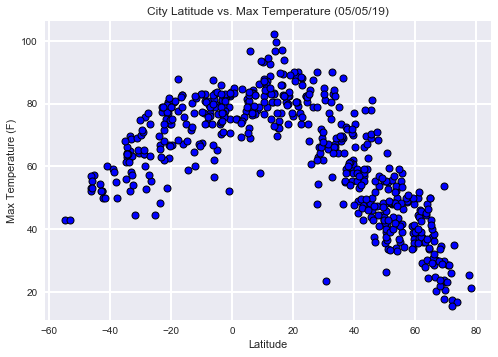

In [72]:
#plot against maximum temperature
plt.scatter(x,y_temp, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(color='w', linestyle='solid', linewidth=2)
plt.savefig('Lat_vs_MTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

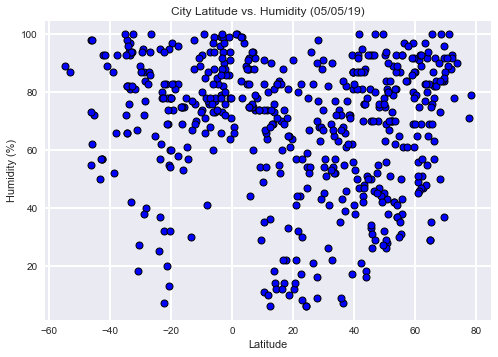

In [61]:
#plot against humidity.. sometimes, I was getting 'valueerror: error x and y must be the same size'
# however, they are same size; 561 each 
plt.scatter(x,y_hum, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
# plt.grid()
plt.grid(color='w', linestyle='solid', linewidth=2)
plt.savefig('Lat_vs_Hum.png')
plt.show()

#### Latitude vs. Cloudiness Plot

In [62]:
#plot against cloudiness
plt.scatter(x,y_cloud, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
# plt.grid()
plt.grid(color='w', linestyle='solid', linewidth=2)
plt.savefig('Lat_vs_Cloud.png')
plt.show()

#### Latitude vs. Wind Speed Plot

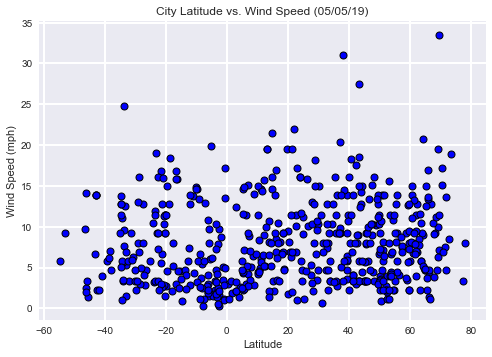

In [63]:
#plot against windspeed
plt.scatter(x,y_wind, marker = "o", color="blue", 
            linewidths=1, edgecolor="black")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
# plt.grid()
plt.grid(color='w', linestyle='solid', linewidth=2)
plt.savefig('Lat_vs_Wind.png')
plt.show()